In [15]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


#Load the CSV dataset 
df = pd.read_csv('amazonbangolufsen.csv', delimiter=',')


In [16]:
df.head()

,Unnamed: 0,Unnamed: 1,Author,Date,Rating,Comment count,Helpful count,Title,Review,Version,Reviewed ASIN,Verified Purchase,Picture included,Review Data,Profile Url,Review Url,Photos
0,1,NaN,Chris,2021-08-11 00:00:00,5.0,0,0,5.0 out of 5 stars Loving them!,"The sound is VERY PLEASING, in its default set...",Colour Name: Black Size Name: One Size,ref=cm_cr_getr_d_rvw_fmt?ie=UTF8&amp;formatTyp...,yes,yes,"413 total ratings, 174 with reviews",https://www.amazon.com//gp/profile/amzn1.accou...,https://www.amazon.com//gp/customer-reviews/R1...,https://m.media-amazon.com/images/I/81bjufVotN...
1,2,NaN,S. King Fan,2021-08-11 00:00:00,5.0,0,0,5.0 out of 5 stars How does it get any better?,"I'm not an audiophile, but I LOVE having a goo...",Colour Name: Grey Mist Size Name: One Size,ref=cm_cr_getr_d_rvw_fmt?ie=UTF8&amp;formatTyp...,no,no,"413 total ratings, 174 with reviews",https://www.amazon.com//gp/profile/amzn1.accou...,https://www.amazon.com//gp/customer-reviews/R2...,NaN
2,3,NaN,LWT50,2021-08-11 00:00:00,5.0,0,0,5.0 out of 5 stars The real deal,Update: Sept 7 2021. The B&O 95 continue to be...,Colour Name: Grey Mist Size Name: One Size,ref=cm_cr_getr_d_rvw_fmt?ie=UTF8&amp;formatTyp...,no,no,"413 total ratings, 174 with reviews",https://www.amazon.com//gp/profile/amzn1.accou...,https://www.amazon.com//gp/customer-reviews/R2...,NaN
3,4,NaN,Tom,2021-08-15 00:00:00,3.0,0,2,3.0 out of 5 stars Nice but way overpriced,These are really nice headphones but it's simp...,Colour Name: Black Size Name: One Size,ref=cm_cr_getr_d_rvw_fmt?ie=UTF8&amp;formatTyp...,no,no,"413 total ratings, 174 with reviews",https://www.amazon.com//gp/profile/amzn1.accou...,https://www.amazon.com//gp/customer-reviews/R2...,NaN
4,5,NaN,o.t.dwight,2021-08-23 00:00:00,5.0,0,0,5.0 out of 5 stars Great sound and very comfor...,"The best along with Apple Air Max , BT I have ...",Colour Name: Black Size Name: One Size,ref=cm_cr_getr_d_rvw_fmt?ie=UTF8&amp;formatTyp...,yes,no,"413 total ratings, 174 with reviews",https://www.amazon.com//gp/profile/amzn1.accou...,https://www.amazon.com//gp/customer-reviews/R3...,NaN


In [17]:
#Preprocess the text data
df = df[['Review', 'Rating']]
df.dropna(inplace=True)
df['Review'] = df['Review'].str.replace('[^\w\s]', '', regex=True).str.lower()

In [18]:
#Remove stop words
stop_words = set(stopwords.words('english'))
additional_stop_words = ['headphones', 'stil','h95', 'would', 'headphone', 'also', 'even', 'much', 'get', 'ive', 'im', 'one', 'put'] 
stop_words.update(additional_stop_words)

df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))


In [19]:
#Perform sentiment analysis using TextBlob
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

#Analyze the results
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    90
Negative     6
Neutral      4
Name: count, dtype: int64


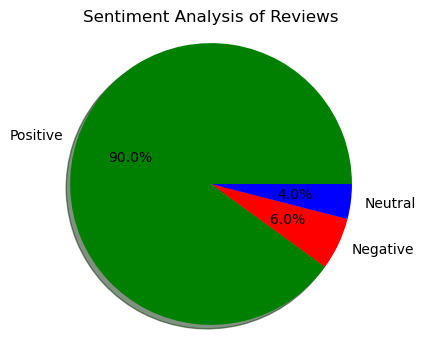

In [20]:
#Plot the pie chart
colors = ['green', 'red', 'blue']
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.1f%%', colors=colors, shadow=True)
plt.title('Sentiment Analysis of Reviews')
plt.axis('equal')
plt.show()

In [21]:
#Find the most common words referred to the product
word_counts = Counter(' '.join(df['Review']).split())
most_common_words = word_counts.most_common(30)  
print(most_common_words)

[('sound', 167), ('quality', 90), ('good', 61), ('like', 58), ('great', 54), ('anc', 51), ('noise', 48), ('volume', 45), ('bass', 44), ('better', 44), ('bo', 42), ('use', 42), ('bose', 38), ('price', 38), ('best', 36), ('sony', 36), ('app', 34), ('well', 34), ('music', 32), ('used', 29), ('feel', 29), ('listening', 29), ('bluetooth', 27), ('dont', 26), ('worth', 26), ('still', 24), ('really', 23), ('case', 23), ('battery', 23), ('could', 23)]


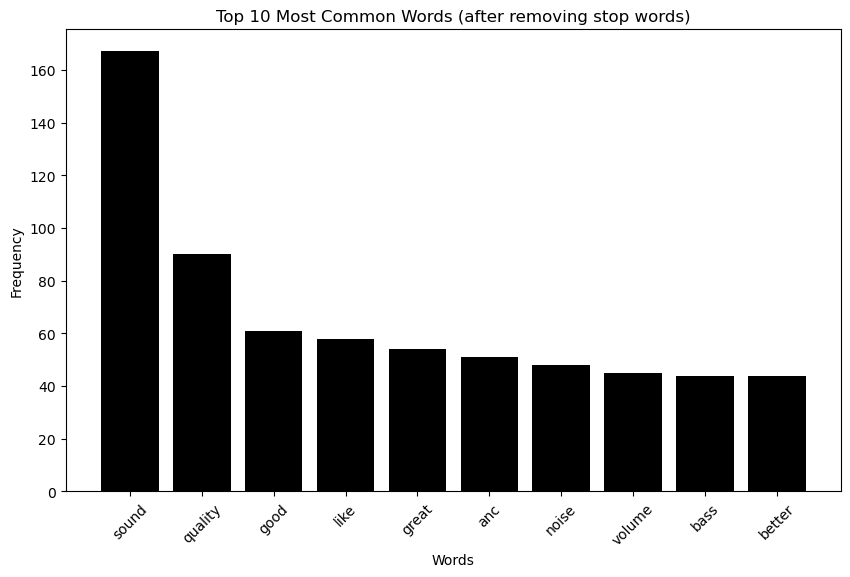

In [22]:
#Plot the bar chart for the most common words
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in most_common_words[:10]], [word[1] for word in most_common_words[:10]], color='black')
plt.title('Top 10 Most Common Words (after removing stop words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Filter the DataFrame for 5-star and 1-star reviews
five_star_reviews = df[df['Rating'] == 5]
one_star_reviews = df[df['Rating'] == 1]

#Combine the text of all 5-star and 1-star reviews
five_star_text = ' '.join(five_star_reviews['Review'].tolist())
one_star_text = ' '.join(one_star_reviews['Review'].tolist())

#Remove stop words
stop_words = set(stopwords.words('english'))
five_star_words = [word for word in word_tokenize(five_star_text) if word.lower() not in stop_words]
one_star_words = [word for word in word_tokenize(one_star_text) if word.lower() not in stop_words]

#Count the frequency of words in 5-star and 1-star reviews
five_star_word_counts = Counter(five_star_words)
one_star_word_counts = Counter(one_star_words)

In [24]:
#Get the most common words for 5-star reviews
most_common_five_star_words = five_star_word_counts.most_common(20)
print(most_common_five_star_words)

[('sound', 113), ('quality', 61), ('good', 42), ('anc', 42), ('great', 37), ('like', 35), ('use', 33), ('best', 30), ('sony', 29), ('noise', 27), ('bass', 26), ('volume', 26), ('better', 25), ('bo', 24), ('well', 23), ('music', 22), ('bose', 21), ('feel', 21), ('listening', 20), ('app', 20)]


In [25]:
#Get the most common words for 1-star reviews 
most_common_one_star_words = one_star_word_counts.most_common(20)
print(most_common_one_star_words)

[('used', 6), ('work', 6), ('sound', 5), ('refund', 5), ('noise', 4), ('amazon', 4), ('quality', 4), ('time', 4), ('could', 3), ('bo', 3), ('pair', 3), ('weeks', 3), ('longer', 3), ('going', 3), ('listen', 3), ('use', 3), ('headset', 3), ('expensive', 3), ('money', 3), ('another', 3)]


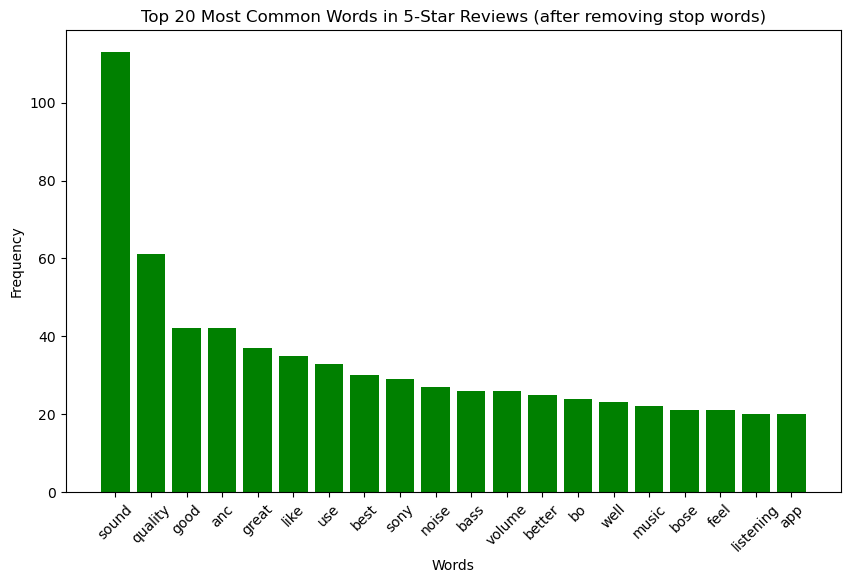

In [26]:
#Plot the bar chart for the most common words in 5-star reviews
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in most_common_five_star_words], [word[1] for word in most_common_five_star_words], color='green')
plt.title('Top 20 Most Common Words in 5-Star Reviews (after removing stop words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

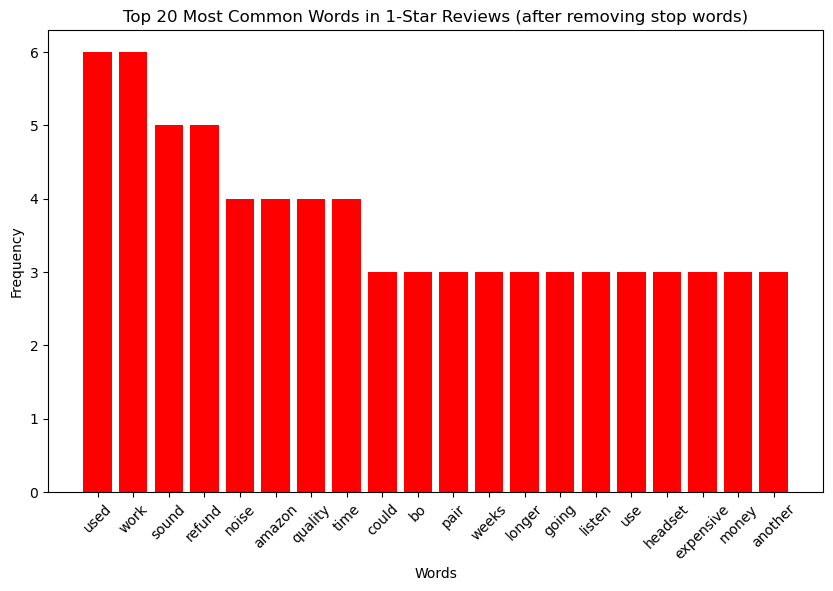

In [27]:
#Plot the bar chart for the most common words in 1-star reviews
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in most_common_one_star_words], [word[1] for word in most_common_one_star_words], color='red')
plt.title('Top 20 Most Common Words in 1-Star Reviews (after removing stop words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [28]:
#Finding the common words between the negatives analysis and positive analysis. 

#Convert the word lists to sets
one_star_words = set([word[0] for word in most_common_one_star_words])
five_star_words = set([word[0] for word in most_common_five_star_words])

#Find the common words
common_words = one_star_words.intersection(five_star_words)

print("Common words between 5-star and 1-star reviews:")
print(common_words)


Common words between 5-star and 1-star reviews:
{'noise', 'sound', 'bo', 'use', 'quality'}
